In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# For interactive plots in notebooks (uncomment if using a notebook)
# %matplotlib inline


In [2]:
# Temperature in Celsius (t_c) and unknown thermometer readings (t_u)
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

t_c = torch.tensor(t_c, dtype=torch.float)
t_u = torch.tensor(t_u, dtype=torch.float)


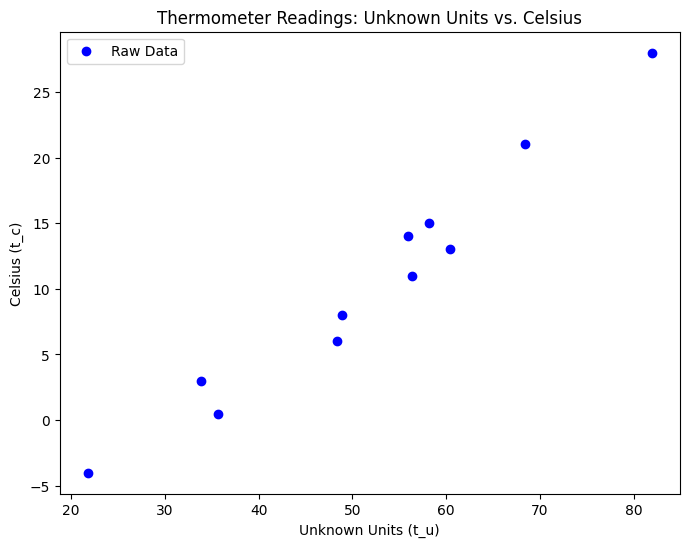

In [3]:
plt.figure(figsize=(8,6))
plt.scatter(t_u.numpy(), t_c.numpy(), color='blue', label='Raw Data')
plt.xlabel('Unknown Units (t_u)')
plt.ylabel('Celsius (t_c)')
plt.title('Thermometer Readings: Unknown Units vs. Celsius')
plt.legend()
plt.show()


In [4]:
def model(t_u, w, b):
    "Simple linear model: predicted Celsius = w * t_u + b"
    return w * t_u + b

def loss_fn(t_p, t_c):
    "Mean squared error loss"
    return ((t_p - t_c)**2).mean()


In [5]:
def dloss_fn(t_p, t_c):
    "Derivative of the squared difference"
    return 2 * (t_p - t_c)

def dmodel_dw(t_u, w, b):
    "Derivative of the model with respect to w"
    return t_u

def dmodel_db(t_u, w, b):
    "Derivative of the model with respect to b"
    return 1.0

def grad_fn(t_u, t_c, t_p, w, b):
    "Compute gradients for w and b and return as a tensor"
    dloss_dw = dloss_fn(t_p, t_c) * dmodel_dw(t_u, w, b)
    dloss_db = dloss_fn(t_p, t_c) * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.mean(), dloss_db.mean()])


In [6]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c, print_every=500):
    losses = []
    for epoch in range(1, n_epochs + 1):
        w, b = params
        t_p = model(t_u, w, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)
        params = params - learning_rate * grad
        losses.append(loss.item())
        if epoch == 1 or epoch % print_every == 0:
            print(f"Epoch {epoch:4d}, Loss {loss.item():.6f}, Params: {params}, Grad: {grad}")
    return params, losses


Training with high learning rate (1e-2) on raw t_u:
Epoch    1, Loss 1763.884766, Params: tensor([-44.1730,  -0.8260]), Grad: tensor([4517.2964,   82.6000])
Epoch    2, Loss 5802484.500000, Params: tensor([2568.4011,   45.1637]), Grad: tensor([-261257.4062,   -4598.9707])
Epoch    3, Loss 19408029696.000000, Params: tensor([-148527.7188,   -2616.3931]), Grad: tensor([15109613.0000,   266155.6875])
Epoch    4, Loss 64915893125120.000000, Params: tensor([8589997.0000,  151310.8594]), Grad: tensor([-8.7385e+08, -1.5393e+07])
Epoch    5, Loss 217130405201969152.000000, Params: tensor([-4.9680e+08, -8.7510e+06]), Grad: tensor([5.0539e+10, 8.9023e+08])
Epoch    6, Loss 726257090571718885376.000000, Params: tensor([2.8732e+10, 5.0610e+08]), Grad: tensor([-2.9229e+12, -5.1486e+10])
Epoch    7, Loss 2429182551776534441492480.000000, Params: tensor([-1.6617e+12, -2.9270e+10]), Grad: tensor([1.6904e+14, 2.9776e+12])
Epoch    8, Loss 8125120778724300355933306880.000000, Params: tensor([9.6102e+13,

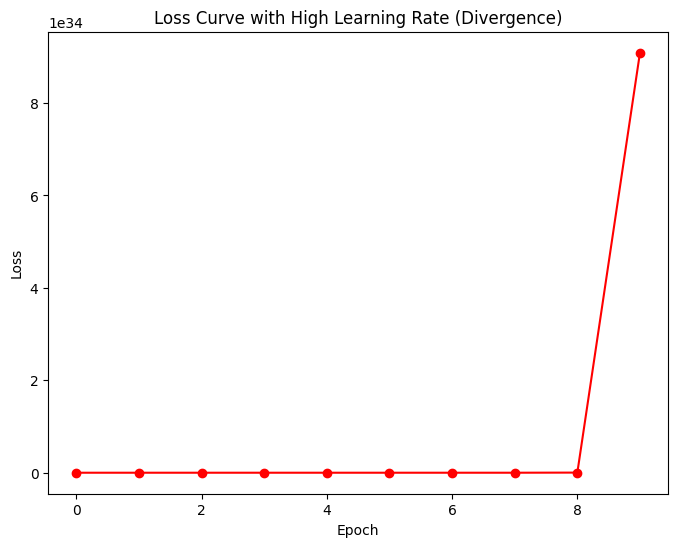

In [7]:
print("Training with high learning rate (1e-2) on raw t_u:")
params_init = torch.tensor([1.0, 0.0])
params_div, losses_div = training_loop(
    n_epochs=15,
    learning_rate=1e-2,
    params=params_init,
    t_u=t_u,
    t_c=t_c,
    print_every=1
)

plt.figure(figsize=(8,6))
plt.plot(losses_div, marker='o', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve with High Learning Rate (Divergence)')
plt.show()


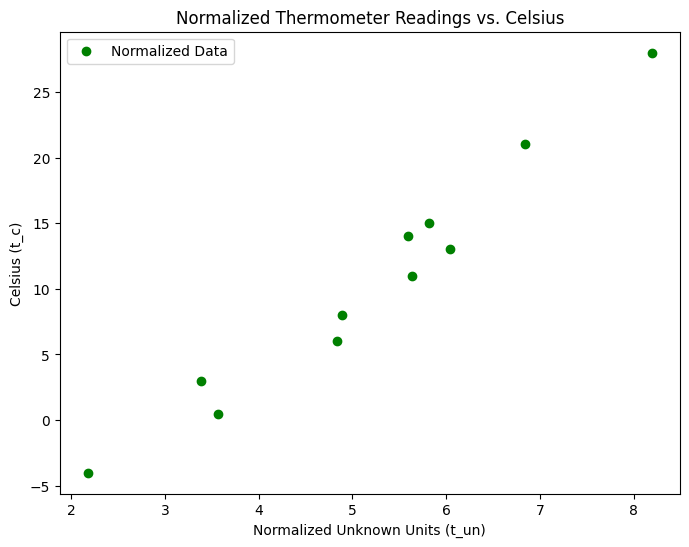

In [8]:
# Large gradients may arise because the input values are too high.
t_un = 0.1 * t_u  # Normalizing t_u by a factor of 0.1

plt.figure(figsize=(8,6))
plt.scatter(t_un.numpy(), t_c.numpy(), color='green', label='Normalized Data')
plt.xlabel('Normalized Unknown Units (t_un)')
plt.ylabel('Celsius (t_c)')
plt.title('Normalized Thermometer Readings vs. Celsius')
plt.legend()
plt.show()


Training with normalized t_u (t_un) and learning rate 1e-2:
Epoch    1, Loss 80.364342, Params: tensor([1.7761, 0.1064]), Grad: tensor([-77.6140, -10.6400])
Epoch  500, Loss 7.860117, Params: tensor([ 4.0443, -9.8133]), Grad: tensor([-0.2252,  1.2748])
Epoch 1000, Loss 3.828538, Params: tensor([  4.8021, -14.1031]), Grad: tensor([-0.0962,  0.5448])
Epoch 1500, Loss 3.092191, Params: tensor([  5.1260, -15.9365]), Grad: tensor([-0.0411,  0.2328])
Epoch 2000, Loss 2.957698, Params: tensor([  5.2644, -16.7200]), Grad: tensor([-0.0176,  0.0995])
Epoch 2500, Loss 2.933134, Params: tensor([  5.3236, -17.0549]), Grad: tensor([-0.0075,  0.0425])
Epoch 3000, Loss 2.928648, Params: tensor([  5.3489, -17.1980]), Grad: tensor([-0.0032,  0.0182])
Epoch 3500, Loss 2.927831, Params: tensor([  5.3597, -17.2591]), Grad: tensor([-0.0014,  0.0078])
Epoch 4000, Loss 2.927680, Params: tensor([  5.3643, -17.2853]), Grad: tensor([-0.0006,  0.0033])
Epoch 4500, Loss 2.927651, Params: tensor([  5.3662, -17.2964

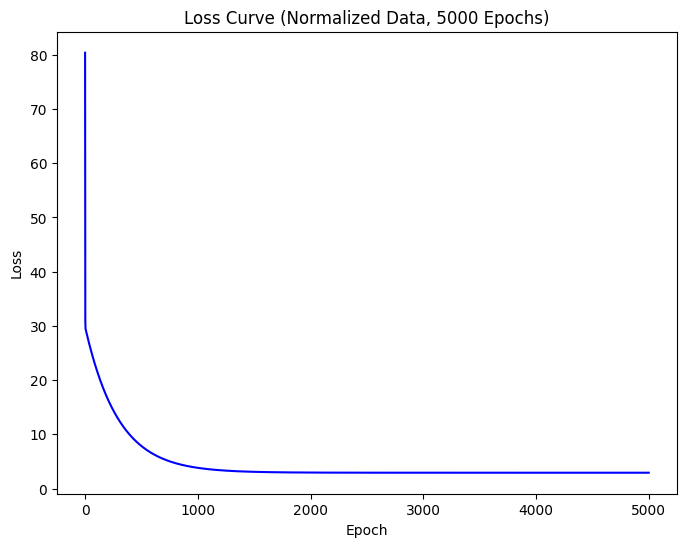

In [9]:
print("Training with normalized t_u (t_un) and learning rate 1e-2:")
params_init = torch.tensor([1.0, 0.0])
params_conv, losses_conv = training_loop(
    n_epochs=5000,
    learning_rate=1e-2,
    params=params_init,
    t_u=t_un,
    t_c=t_c,
    print_every=500
)

plt.figure(figsize=(8,6))
plt.plot(losses_conv, color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve (Normalized Data, 5000 Epochs)')
plt.show()


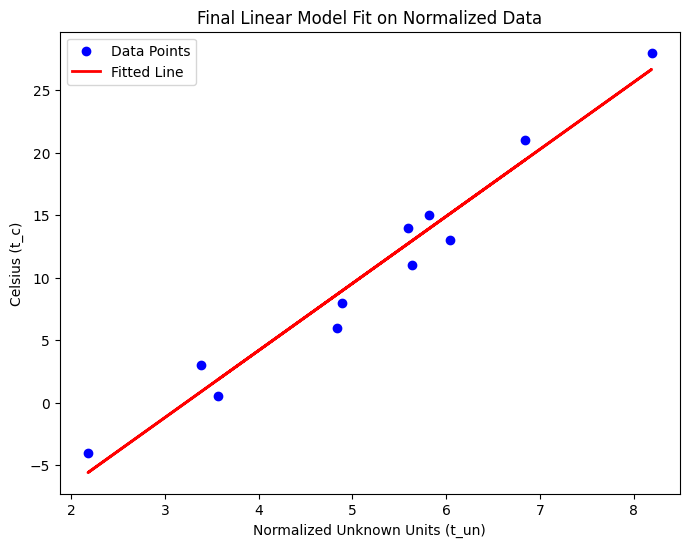

In [10]:
t_p_final = model(t_un, params_conv[0], params_conv[1])
plt.figure(figsize=(8,6))
plt.scatter(t_un.numpy(), t_c.numpy(), color='blue', label='Data Points')
plt.plot(t_un.numpy(), t_p_final.detach().numpy(), color='red', linewidth=2, label='Fitted Line')
plt.xlabel('Normalized Unknown Units (t_un)')
plt.ylabel('Celsius (t_c)')
plt.title('Final Linear Model Fit on Normalized Data')
plt.legend()
plt.show()


In [11]:
print("Final parameters (w, b):", params_conv)
# With proper normalization, the final parameters should be stable.

Final parameters (w, b): tensor([  5.3671, -17.3012])
